In [23]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
workspace = "SS316L_small_10_micron"
workspace_path = f"../../../out/{workspace}/"
simulation_folders = sorted([item for item in os.listdir(workspace_path) if os.path.isdir(os.path.join(workspace_path, item))])
# simulation_folders = os.listdir(workspace_path)
print(simulation_folders)

['0_0100_00.4_1.0E-4_1.0E-5', '0_0100_00.8_1.0E-4_1.0E-5', '0_0100_01.2_1.0E-4_1.0E-5', '0_0100_01.6_1.0E-4_1.0E-5', '0_0100_02.0_1.0E-4_1.0E-5', '0_0200_00.4_1.0E-4_1.0E-5', '0_0200_00.8_1.0E-4_1.0E-5', '0_0200_01.2_1.0E-4_1.0E-5', '0_0200_01.6_1.0E-4_1.0E-5', '0_0200_02.0_1.0E-4_1.0E-5', '0_0300_00.4_1.0E-4_1.0E-5', '0_0300_00.8_1.0E-4_1.0E-5', '0_0300_01.2_1.0E-4_1.0E-5', '0_0300_01.6_1.0E-4_1.0E-5', '0_0300_02.0_1.0E-4_1.0E-5', '0_0400_00.4_1.0E-4_1.0E-5', '0_0400_00.8_1.0E-4_1.0E-5', '0_0400_01.2_1.0E-4_1.0E-5', '0_0400_01.6_1.0E-4_1.0E-5', '0_0400_02.0_1.0E-4_1.0E-5']


   material  power  velocity  avg_depth  avg_length  avg_width
0    S31603    100       0.4   0.000107    0.000166   0.000117
1    S31603    100       0.8   0.000057    0.000126   0.000105
2    S31603    100       1.2   0.000037    0.000135   0.000091
3    S31603    100       1.6   0.000032    0.000099   0.000077
4    S31603    100       2.0   0.000025    0.000141   0.000084
5    S31603    200       0.4   0.000214    0.000268   0.000149
6    S31603    200       0.8   0.000120    0.000277   0.000170
7    S31603    200       1.2   0.000084    0.000220   0.000145
8    S31603    200       1.6   0.000063    0.000205   0.000140
9    S31603    200       2.0   0.000049    0.000214   0.000128
10   S31603    300       0.4   0.000308    0.000326   0.000187
11   S31603    300       0.8   0.000174    0.000365   0.000200
12   S31603    300       1.2   0.000126    0.000353   0.000211
13   S31603    300       1.6   0.000094    0.000305   0.000182
14   S31603    300       2.0   0.000076    0.000274   0

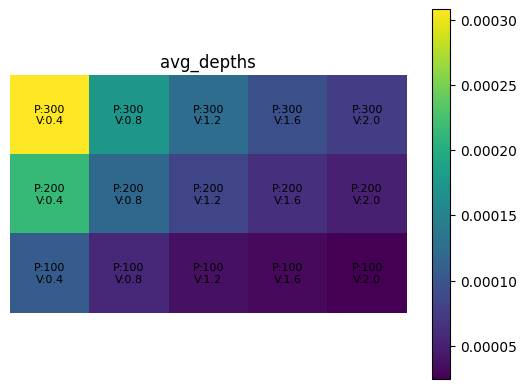

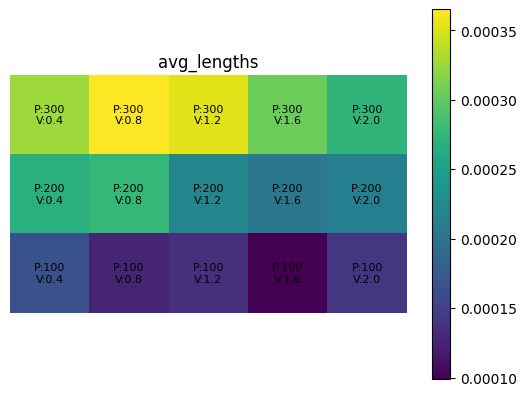

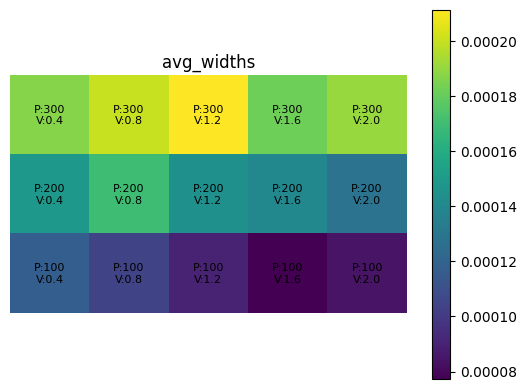

In [36]:
avg_depths = []
avg_lengths = []
avg_widths = []

powers = []
velocities = []

avg_depth_row = []
avg_length_row = []
avg_width_row = []

powers_row = []
velocities_row = []

prev_power = None

data = []

for simulation_folder in simulation_folders:
    simulation_path = f"{workspace_path}/{simulation_folder}"
    dimensions = pd.read_csv(f"{simulation_path}/measurements/melt_pool/temperature.csv")
    # print(f"\npower: {dimensions["power"][0]}, velocity: {dimensions["velocity"][0]}")
    d, l, w = dimensions[["depth_m", "length_m", "width_m"]].mean()
    # print(d, l, w)

    power = dimensions["power"][0]
    velocity = dimensions["velocity"][0]

    if prev_power == power or prev_power == None:
        avg_depth_row.append(d)
        avg_length_row.append(l)
        avg_width_row.append(w)

        powers_row.append(power)
        velocities_row.append(velocity)

    else:
        avg_depths.append(avg_depth_row)
        avg_lengths.append(avg_length_row)
        avg_widths.append(avg_width_row)

        powers.append(powers_row)
        velocities.append(velocities_row)

        avg_depth_row = [d]
        avg_length_row = [l]
        avg_width_row = [w]

        powers_row = [power]
        velocities_row = [velocity]
    
    prev_power = power

    data.append({
        "material": dimensions["material"][0],
        "power": power,
        "velocity": velocity,
        "avg_depth": d,
        "avg_length": l,
        "avg_width": w
    })

dimensions_df = pd.DataFrame(data)
dimensions_df.to_csv("generate_process_map.csv")

print(dimensions_df)

# Function to annotate heatmap cells with power and velocity
def annotate_heatmap(ax, data, powers, velocities):
    for i in range(len(data)):
        for j in range(len(data[i])):
            power = powers[i][j]
            velocity = velocities[i][j]
            ax.text(
                j, i, f"P:{power}\nV:{velocity}",
                ha="center", va="center", fontsize=8, color="black"
            )

# Plot avg_depths
fig, ax = plt.subplots()
plt.title("avg_depths")
cax = ax.imshow(avg_depths, cmap="viridis")
annotate_heatmap(ax, avg_depths, powers, velocities)
ax.invert_yaxis()
ax.axis("off")
plt.colorbar(cax)
plt.show()

# Plot avg_lengths
fig, ax = plt.subplots()
plt.title("avg_lengths")
cax = ax.imshow(avg_lengths, cmap="viridis")
annotate_heatmap(ax, avg_lengths, powers, velocities)
ax.invert_yaxis()
ax.axis("off")
plt.colorbar(cax)
plt.show()

# Plot avg_widths
fig, ax = plt.subplots()
plt.title("avg_widths")
cax = ax.imshow(avg_widths, cmap="viridis")
annotate_heatmap(ax, avg_widths, powers, velocities)
ax.invert_yaxis()
ax.axis("off")
plt.colorbar(cax)
plt.show()

In [ ]:
for simulation_folder in simulation_folders:
   simulation_path = f"{workspace_path}/{simulation_folder}"
   dimensions = pd.read_csv(f"{simulation_path}/measurements/melt_pool/temperature.csv")
   print(f"\npower: {dimensions["power"][0]}, velocity: {dimensions["velocity"][0]}")
   # skip first n values
   print(dimensions.iloc[50:][["depth_m", "length_m", "width_m"]].mean())


power: 100, velocity: 0.4
depth_m     0.000118
length_m    0.000168
width_m     0.000109
dtype: float64

power: 100, velocity: 0.8
depth_m     0.000059
length_m    0.000121
width_m     0.000096
dtype: float64

power: 100, velocity: 1.2
depth_m     0.000038
length_m    0.000132
width_m     0.000084
dtype: float64

power: 100, velocity: 1.6
depth_m     0.000033
length_m    0.000093
width_m     0.000071
dtype: float64

power: 100, velocity: 2.0
depth_m     0.000025
length_m    0.000139
width_m     0.000077
dtype: float64

power: 200, velocity: 0.4
depth_m     0.000233
length_m    0.000276
width_m     0.000130
dtype: float64

power: 200, velocity: 0.8
depth_m     0.000126
length_m    0.000284
width_m     0.000161
dtype: float64

power: 200, velocity: 1.2
depth_m     0.000086
length_m    0.000217
width_m     0.000131
dtype: float64

power: 200, velocity: 1.6
depth_m     0.000064
length_m    0.000200
width_m     0.000127
dtype: float64

power: 200, velocity: 2.0
depth_m     0.000049
length_